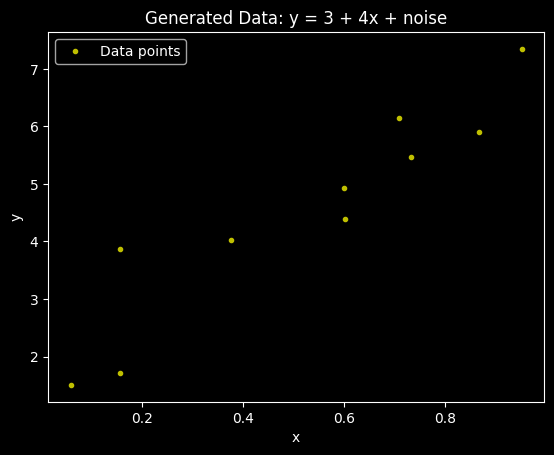

In [30]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

# -----------------------
# Data Generation
# -----------------------
np.random.seed(42)   # reproducibility
n = 10
x = np.random.rand(n, 1)   # random values in [0,1]

# True relation: y = 3 + 4x + noise
y = 3 + 4 * x + np.random.randn(n, 1)

# Plot
plt.plot(x, y, "y.", label="Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data: y = 3 + 4x + noise")
plt.legend()
plt.show()


Theta (Normal Equation): [1.66362132 5.50933732]
Predictions (x=0, x=1): [1.66362132 7.17295864]


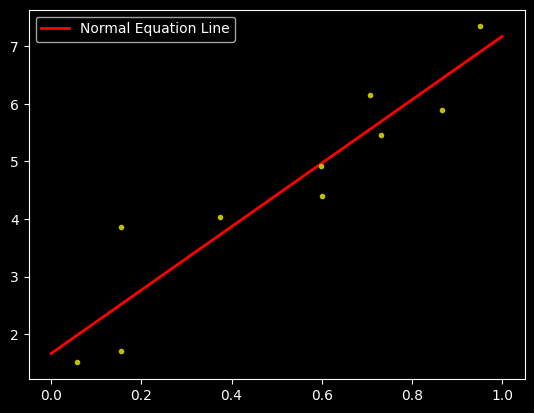

In [31]:
# Add bias (dummy feature = column of 1s)
x_b = add_dummy_feature(x, 1)

# Normal Equation
theta_ne = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
print("Theta (Normal Equation):", theta_ne.ravel())

# Predictions at x=0 and x=1
x_new = np.array([[0], [1]])
x_new_b = add_dummy_feature(x_new, 1)
y_pred_ne = x_new_b @ theta_ne
print("Predictions (x=0, x=1):", y_pred_ne.ravel())

# Plot
plt.plot(x_new, y_pred_ne, "r-", linewidth=2, label="Normal Equation Line")
plt.plot(x, y, "y.")
plt.legend()
plt.show()
